<a href="https://colab.research.google.com/github/MengOonLee/Deep_learning/blob/master/PyTorch/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning with PyTorch

## Introduction

### Tensors

In [1]:
import numpy as np
np.random.seed(seed=42)
import torch
torch.manual_seed(seed=42)

a = torch.tensor([
    [2, 3, 5],
    [1, 2, 9]
])
if torch.cuda.is_available():
    a = a.cuda()
print(a.shape)

a = np.array([
    [2, 3, 5],
    [1, 2, 9]
])
a = torch.tensor(a)
if torch.cuda.is_available():
    a = a.cuda()
print(a.cpu().numpy())

a = torch.rand(size=(2, 2))
b = torch.rand(size=(2, 2))
if torch.cuda.is_available():
    a = a.cuda()
    b = b.cuda()

# Dot product
print(torch.matmul(input=a, other=b))
# Element-wise multiplication
print(a * b)

torch.Size([2, 3])
[[2 3 5]
 [1 2 9]]
tensor([[0.5792, 1.2563],
        [0.3956, 0.9914]], device='cuda:0')
tensor([[0.3445, 0.5498],
        [0.0982, 0.7613]], device='cuda:0')


In [ ]:
import torch
torch.manual_seed(seed=42)

# Create a matrix of ones with shape 3 by 3
a = torch.ones(size=(3, 3))
# Create an identity matrix with shape 3 by 3
b = torch.eye(n=3)

if torch.cuda.is_available():
    a = a.cuda()
    b = b.cuda()

# Matrix multiplication of a with b
c = torch.matmul(input=a, other=b)
print(c)

# Element-wise multiplication of a with b
c = a * b
print(c)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], device='cuda:0')


### Forward propagation

In [ ]:
import torch
torch.manual_seed(seed=42)

# Initialize tensors x, y and z
x = torch.rand(size=(1000, 1000))
y = torch.rand(size=(1000, 1000))
z = torch.rand(size=(1000, 1000))

if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    z = z.cuda()

# Multiply tensors x and y
q = torch.matmul(input=x, other=y)
# Element-wise multiply tensors z with q
f = z * q
mean_f = torch.mean(input=f)
print(mean_f)
# Calculate the gradients
mean_f.backward()

tensor(125.1406, device='cuda:0')


### Backpropagation

In [ ]:
import torch
torch.manual_seed(seed=42)

# Initialize x, y and z to values 4, -3 and 5
x = torch.tensor(4., requires_grad=True)
y = torch.tensor(-3., requires_grad=True)
z = torch.tensor(5., requires_grad=True)

# Set q to sum of x and y
q = x + y
# Set f to product of q with z
f = q * z
# Compute the derivatives
f.backward()

# Print the gradients
print("Gradient of z is:", z.grad)
print("Gradient of y is:", y.grad)
print("Gradient of x is:", x.grad)

Gradient of z is: tensor(1.)
Gradient of y is: tensor(5.)
Gradient of x is: tensor(5.)


### Neural networks

In [ ]:
import torch
torch.manual_seed(seed=42)

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(in_features=784, out_features=200)
        self.fc2 = torch.nn.Linear(in_features=200, out_features=10)

    def forward(self, x):
        # use the instantiated layers and return x
        x = self.fc1(x)
        x = self.fc2(x)
        return x

input_layer = torch.rand(784)
net = Net()

if torch.cuda.is_available():
    input_layer = input_layer.cuda()
    net = net.cuda()

result = net(input_layer)
print("Result:", result)

Result: tensor([-0.1113, -0.0151,  0.1005,  0.2801,  0.2317, -0.1189, -0.3775,  0.0440,
         0.3325, -0.1394], device='cuda:0', grad_fn=<ViewBackward0>)


## Artificial Neural Networks

### Activation functions

In [7]:
import torch
torch.manual_seed(seed=42)

input_layer = torch.tensor([[0.0401, -0.9005,  0.0397, -0.0876]])
weight_1 = torch.randn(size=(4, 4))
weight_2 = torch.randn(size=(4, 4))
weight_3 = torch.randn(size=(4, 4))

if torch.cuda.is_available():
    input_layer = input_layer.cuda()
    weight_1 = weight_1.cuda()
    weight_2 = weight_2.cuda()
    weight_3 = weight_3.cuda()

# Instantiate non-linearity
relu = torch.nn.ReLU()

# Apply non-linearity on hidden_1 and hidden_2
hidden_1_activated = relu(
    torch.matmul(input=input_layer, other=weight_1)
)
hidden_2_activated = relu(
    torch.matmul(input=hidden_1_activated, other=weight_2)
)
print(torch.matmul(input=hidden_2_activated, other=weight_3))

# Apply non-linearity to the product of first two weights.
weight_composed_1_activated = relu(
    torch.matmul(input=weight_1, other=weight_2)
)
# Multiply `weight_composed_1_activated` with `weight_3
weight = torch.matmul(input=weight_composed_1_activated, other=weight_3)
# Multiply input_layer with weight
print(torch.matmul(input=input_layer, other=weight))

tensor([[-5.0533,  7.3178, -4.4011, -3.3757]], device='cuda:0')
tensor([[ 2.4246,  2.0822,  0.2086, -3.6637]], device='cuda:0')


### Loss function

In [11]:
import torch
torch.manual_seed(seed=42)

# Initialize the scores and ground truth
logits = torch.tensor([[-1.2, 0.12, 4.8]])
ground_truth = torch.tensor([2])

if torch.cuda.is_available():
    logits = logits.cuda()
    ground_truth = ground_truth.cuda()

# Instantiate cross entropy loss
criterion = torch.nn.CrossEntropyLoss()

# Compute and print the loss
loss = criterion(input=logits, target=ground_truth)
print(loss)

tensor(0.0117, device='cuda:0')


## Convolutional Neural Networks (CNNs)

### Convolution operator

In [11]:
import torch
torch.manual_seed(seed=42)

# Create 10 random images of shape (1, 28, 28)
images = torch.randn(size=(10, 1, 28, 28))
if torch.cuda.is_available():
    images = images.cuda()
print(f"Image size: {images.shape}")
# Build 6 conv. filters
conv2d = torch.nn.Conv2d(
    in_channels=1, out_channels=6, kernel_size=(3, 3),
    stride=1, padding=1
)
# Build a max pooling operator with size 2.
maxpool2d = torch.nn.MaxPool2d(kernel_size=(2, 2))
# Build an average pooling operator with size 2
avgpool2d = torch.nn.AvgPool2d(kernel_size=(2, 2))
if torch.cuda.is_available():
    conv2d = conv2d.cuda()
    maxpool2d = maxpool2d.cuda()
    avgpool2d = avgpool2d.cuda()

# Convolve the image with the filters
print(f"Output Conv2d shape: {conv2d(images).shape}")
# Apply the max pooling operator
print(f"Output MaxPool2d shape: {maxpool2d(out_conv2d).shape}")
# Apply the average pooling operator
print(f"Output AvgPool2d shape: {avgpool2d(out_conv2d).shape}")

# Create 6 filters
filters_conv2d = torch.randn(size=(6, 1, 3, 3))
if torch.cuda.is_available():
    filters_conv2d = filters_conv2d.cuda()
# Convolve the image with the filters
out_f_conv2d = torch.nn.functional.conv2d(
    input=images, weight=filters_conv2d,
    stride=1, padding=1
)
# Use max pooling operator in the image
out_f_maxpool2d = torch.nn.functional.max_pool2d(
    input=out_f_conv2d, kernel_size=(2, 2)
)
# Use avg pooling operator in the image
out_f_avgpool2d = torch.nn.functional.avg_pool2d(
    input=out_f_conv2d, kernel_size=(2, 2)
)
print(f"Output F Conv2d shape: {out_f_conv2d.shape}")
print(f"Output F MaxPool2d shape: {out_f_maxpool2d.shape}")
print(f"Output F AvgPool2d shape: {out_f_avgpool2d.shape}")

Image size: torch.Size([10, 1, 28, 28])
Output Conv2d shape: torch.Size([10, 6, 28, 28])
Output MaxPool2d shape: torch.Size([10, 6, 14, 14])
Output AvgPool2d shape: torch.Size([10, 6, 14, 14])
Output F Conv2d shape: torch.Size([10, 6, 28, 28])
Output F MaxPool2d shape: torch.Size([10, 6, 14, 14])
Output F AvgPool2d shape: torch.Size([10, 6, 14, 14])


### Training CNN

Files already downloaded and verified
Files already downloaded and verified


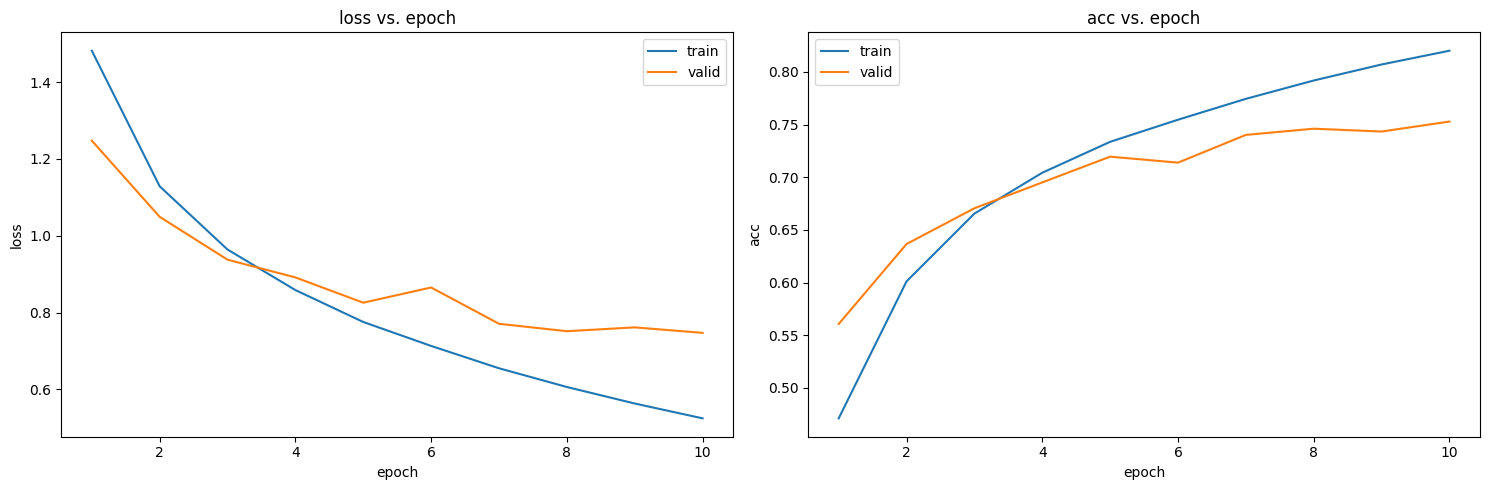

In [1]:
import numpy as np
np.random.seed(seed=42)
import pandas as pd
from sklearn import metrics
import torch
torch.manual_seed(seed=42)
import torchvision
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])
trainset = torchvision.datasets.CIFAR10(root='./data',
    train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(dataset=trainset,
    batch_size=32, shuffle=True, num_workers=4)
testset = torchvision.datasets.CIFAR10(root='./data',
    train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(dataset=testset,
    batch_size=32, shuffle=False, num_workers=4)

class Net(torch.nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        # Instantiate three convolutional layers
        self.conv1 = torch.nn.Conv2d(in_channels=3, out_channels=32,
            kernel_size=(3, 3), padding=1)
        self.conv2 = torch.nn.Conv2d(in_channels=32, out_channels=64,
            kernel_size=(3, 3), padding=1)
        self.conv3 = torch.nn.Conv2d(in_channels=64, out_channels=128,
            kernel_size=(3, 3), padding=1)
        # Instantiate a max pooling layer
        self.pool = torch.nn.MaxPool2d(kernel_size=(2, 2), stride=2)
        # Instantiate a fully connected layer
        self.fc = torch.nn.Linear(in_features=128*4*4, out_features=num_classes)

    def forward(self, x):
        # Apply conv followed by ReLU, then pool
        x = self.pool(torch.nn.functional.relu(self.conv1(x)))
        x = self.pool(torch.nn.functional.relu(self.conv2(x)))
        x = self.pool(torch.nn.functional.relu(self.conv3(x)))
        # Prepare the imaage for the fully connected layer
        x = x.view(-1, 128*4*4)
        # Apply the fully connected layer and return the result
        return self.fc(x)

net = Net()
if torch.cuda.is_available():
    net = net.cuda()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=net.parameters(), lr=3e-4)

history = {
    'train_loss':[],
    'train_acc':[],
    'valid_loss':[],
    'valid_acc':[]
}
for epoch in range(10):
    train_loss, train_acc = 0.0, 0.0
    for x, y in trainloader:
        # Get the inputs
        if torch.cuda.is_available():
            x = x.cuda()
            y = y.cuda()
        # Zero the parameter gradients
        optimizer.zero_grad()
        # Compute the forward pass
        y_pred = net(x)
        train_acc += metrics.accuracy_score(
            y_true=y.cpu().numpy(),
            y_pred=y_pred.argmax(dim=-1).cpu().numpy()
        )
        # Compute the loss function
        loss = criterion(input=y_pred, target=y)
        train_loss += loss.item()
        # Compute the gradients
        loss.backward()
        # Update the weights
        optimizer.step()
    train_loss = train_loss / len(trainloader)
    train_acc = train_acc / len(trainloader)

    valid_loss, valid_acc = 0.0, 0.0
    net.eval()
    with torch.no_grad():
        # Iterate over the data in the test_loader
        for x, y in testloader:
            # Get the image and label from data
            if torch.cuda.is_available():
                x = x.cuda()
                y = y.cuda()
            # Make a forward pass in the net with inputs
            y_pred = net(x)
            valid_acc += metrics.accuracy_score(
                y_true=y.cpu().numpy(),
                y_pred=y_pred.argmax(dim=-1).cpu().numpy()
            )
            # Argmax the results of the net
            loss = criterion(input=y_pred, target=y)
            valid_loss += loss.item()
        valid_loss = valid_loss / len(testloader)
        valid_acc = valid_acc / len(testloader)
        net.train()

        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['valid_loss'].append(valid_loss)
        history['valid_acc'].append(valid_acc)

df_history = pd.DataFrame(history)
metrics = ['loss', 'acc']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for ax, metric in zip(axes, metrics):
    sns.lineplot(ax=ax, data=df_history, label='train',
        x=df_history.index+1, y=f'train_{metric}')
    try:
        sns.lineplot(ax=ax, data=df_history, label='valid',
            x=df_history.index+1, y=f'valid_{metric}')
    except Exception:
        pass
    ax.legend(loc='best')
    ax.set_xlabel(xlabel='epoch')
    ax.set_ylabel(ylabel=f'{metric}')
    ax.set_title(label=f'{metric} vs. epoch')
fig.tight_layout()
plt.show()

Train dataset shape: torch.Size([60000, 28, 28]) 
Test dataset shape: torch.Size([10000, 28, 28])
Train dataset targets: tensor([5, 0, 4,  ..., 5, 6, 8]) 
Test dataset targets: tensor([7, 2, 1,  ..., 4, 5, 6])
Train dataset batch size: 32 
Test dataset batch size: 32
Train loss: 0.24, Train acc: 0.93, Valid loss: 0.08, Valid acc: 0.97
Train loss: 0.08, Train acc: 0.98, Valid loss: 0.06, Valid acc: 0.98
Train loss: 0.06, Train acc: 0.98, Valid loss: 0.05, Valid acc: 0.99
Train loss: 0.05, Train acc: 0.99, Valid loss: 0.05, Valid acc: 0.99
Train loss: 0.04, Train acc: 0.99, Valid loss: 0.03, Valid acc: 0.99


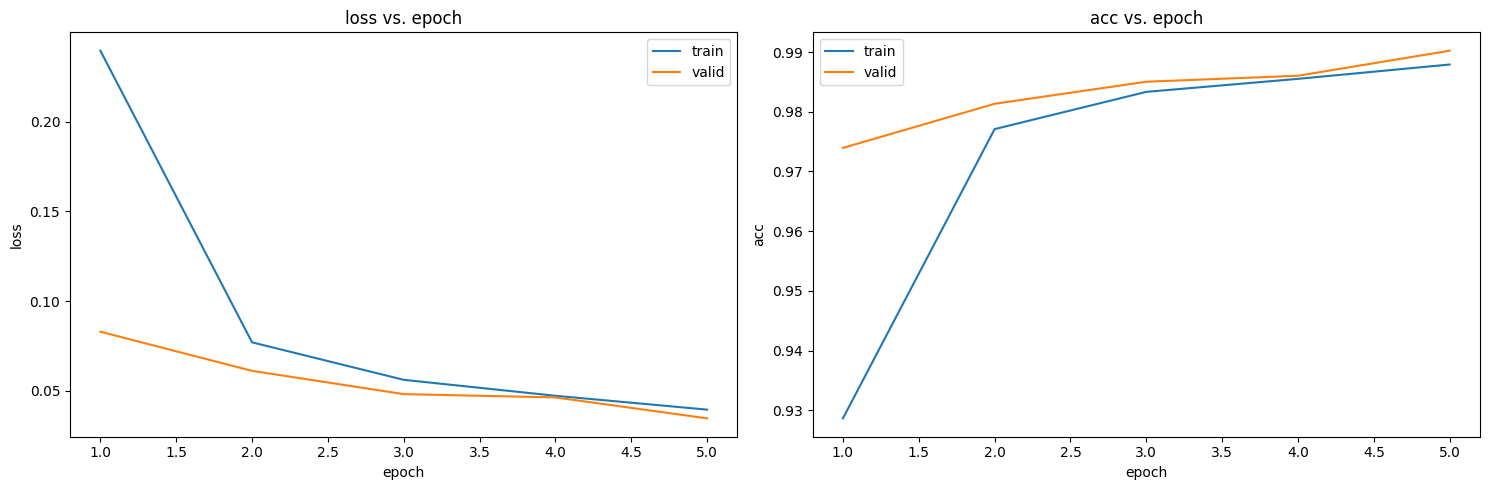

Test accuracy: 99%


In [1]:
import numpy as np
np.random.seed(seed=42)
import pandas as pd
from sklearn import metrics
import torch
torch.manual_seed(seed=42)
import torchvision
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Transform the data to torch tensors and normalize it
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=0.1307, std=0.3081)
])
# Prepare training set and testing set
trainset = torchvision.datasets.MNIST(root='./data',
    train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data',
    train=False, download=True, transform=transform)

# Prepare training, validation and testing loader
# Shuffle the indices
indices = np.arange(60000)
np.random.shuffle(indices)

trainloader = torch.utils.data.DataLoader(dataset=trainset,
    batch_size=32, shuffle=False, num_workers=4,
    sampler=torch.utils.data.SubsetRandomSampler(indices[:50000])
)
validloader = torch.utils.data.DataLoader(dataset=trainset,
    batch_size=32, shuffle=False, num_workers=4,
    sampler=torch.utils.data.SubsetRandomSampler(indices[50000:])
)
testloader = torch.utils.data.DataLoader(dataset=testset,
    batch_size=32, shuffle=False, num_workers=4
)

# Compute the shape of the training, validation and testing set
trainset_shape = trainloader.dataset.data.shape
testset_shape = testloader.dataset.data.shape
# Print the computed shapes
print("Train dataset shape:", trainset_shape,
    "\nTest dataset shape:", testset_shape
)
# Compute the targets of the training, validation and testing set
trainset_targets = trainloader.dataset.targets
testset_targets = testloader.dataset.targets
# Print the computed shapes
print("Train dataset targets:", trainset_targets,
    "\nTest dataset targets:", testset_targets
)
# Compute the size of the minibatch for training, validation and testing set
trainset_batchsize = trainloader.batch_size
testset_batchsize = testloader.batch_size
# Print sizes of the minibatch
print("Train dataset batch size:", trainset_batchsize,
    "\nTest dataset batch size:", testset_batchsize
)

# Define the class Net
class Net(torch.nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        # Declare all the layers for feature extraction
        self.features = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=1, out_channels=10,
                kernel_size=(3, 3), padding=1),
            torch.nn.BatchNorm2d(num_features=10),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=(2, 2), stride=2),
            
            torch.nn.Conv2d(in_channels=10, out_channels=20,
                kernel_size=(3, 3), padding=1),
            torch.nn.BatchNorm2d(num_features=20),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=(2, 2), stride=2)
        )
        # Declare all the layers for classification
        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(in_features=7*7*20, out_features=512),
            torch.nn.ReLU(),
            torch.nn.Dropout(p=0.3),
            torch.nn.Linear(in_features=512, out_features=128),
            torch.nn.ReLU(),
            torch.nn.Dropout(p=0.3),
            torch.nn.Linear(in_features=128, out_features=num_classes)
        )

    def forward(self, x):
        # Apply the feature extractor in the input
        x = self.features(x)
        # Squeeze the three spatial dimensions in one
        x = x.view(-1, 7*7*20)
        # Classify the images
        x = self.classifier(x)
        return x        

# Instantiate the network, the Adam optimizer and Cross-Entropy loss function
model = Net(num_classes=10)
if torch.cuda.is_available():
    model = model.cuda()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(),
    lr=3e-4, weight_decay=1e-4)

history = {
    'train_loss': [],
    'train_acc': [],
    'valid_loss': [],
    'valid_acc': []
}

# Loop over the dataset multiple times
for epoch in range(5):
    train_loss, train_acc = 0.0, 0.0
    for x, y in trainloader:
        # Get the inputs
        if torch.cuda.is_available():
            x = x.cuda()
            y = y.cuda()
        # Zero the parameter gradients
        optimizer.zero_grad()
        # Complete a forward pass
        y_pred = model(x)
        # Calculate accuracy over the batch
        train_acc += metrics.accuracy_score(
            y_true=y.cpu().numpy(), 
            y_pred=y_pred.argmax(dim=-1).cpu().numpy()
        )
        # Compute the loss, gradients and change the weights
        loss = criterion(input=y_pred, target=y)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
    # Calculate the mean loss value
    train_loss = train_loss / len(trainloader)
    # Calculate accuracy over the whole epoch
    train_acc = train_acc / len(trainloader)

    valid_loss, valid_acc = 0.0, 0.0
    # Set the model in eval mode
    model.eval()
    with torch.no_grad():
        for x, y in validloader:
            if torch.cuda.is_available():
                x = x.cuda()
                y = y.cuda()
            # Do the forward pass and get the predictions
            y_pred = model(x)
            # Calculate accuracy over the batch
            valid_acc += metrics.accuracy_score(
                y_true=y.cpu().numpy(), 
                y_pred=y_pred.argmax(dim=-1).cpu().numpy()
            )
            # Compute the loss
            loss = criterion(input=y_pred, target=y)
            valid_loss += loss.item()
    # Calculate the mean loss value
    valid_loss = valid_loss / len(testloader)
    # Calculate accuracy over the whole epoch
    valid_acc = valid_acc / len(testloader)
    print(f"Train loss: {train_loss:.2f}, Train acc: {train_acc:.2f}, \
Valid loss: {valid_loss:.2f}, Valid acc: {valid_acc:.2f}")
    # Set the model back to training mode
    model.train()

    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['valid_loss'].append(valid_loss)
    history['valid_acc'].append(valid_acc)

df_history = pd.DataFrame(history)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for ax, m in zip(axes, ['loss', 'acc']):
    sns.lineplot(ax=ax, data=df_history, label='train',
        x=df_history.index+1, y=f'train_{m}')
    try:
        sns.lineplot(ax=ax, data=df_history, label='valid',
            x=df_history.index+1, y=f'valid_{m}')
    except Exception:
        pass
    ax.legend(loc='best')
    ax.set_xlabel(xlabel='epoch')
    ax.set_ylabel(ylabel=f'{m}')
    ax.set_title(label=f'{m} vs. epoch')
fig.tight_layout()
plt.show()

test_acc = 0.0
# Set the model in eval mode
model.eval()
for x, y in testloader:
    if torch.cuda.is_available():
        x = x.cuda()
        y = y.cuda()
    # Do the forward pass and get the predictions
    y_pred = model(x)
    # Calculate accuracy over the batch
    metrics.accuracy_score
    test_acc += metrics.accuracy_score(
        y_true=y.cpu().numpy(), 
        y_pred=y_pred.argmax(dim=-1).cpu().numpy()
    )
# Calculate accuracy over the whole epoch
test_acc = test_acc / len(testloader)
print("Test accuracy: %d%%"%(100*test_acc))

## Transfer learning

In [ ]:
import torch
torch.manual_seed(seed=42)
import torchvision

# Download resnet18
model = torchvision.models.resnet18(weights="DEFAULT")
# Freeze all the layers bar the last one
for param in model.parameters():
    param.requires_grad = False
# Change the number of out channels
model.fc = torch.nn.Linear(in_features=512, out_features=7)

torch.save(obj=model, f='model.pth')
# Load the parameters from the old model
model.load_state_dict(torch.load('model.pth'))